In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet_v2 import EfficientNetV2S, preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.models import load_model
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import PIL

In [2]:
TYPE_DATA_FOLDER_PATH  = "..\\data\\grouped_images_by_type"
AKIEC_DATA_FOLDER_PATH = "..\\data\\grouped_images_by_type\\akiec\\*"
BCC_DATA_FOLDER_PATH   = "..\\data\\grouped_images_by_type\\bcc\\*"
BKL_DATA_FOLDER_PATH   = "..\\data\\grouped_images_by_type\\bkl\\*"
DF_DATA_FOLDER_PATH    = "..\\data\\grouped_images_by_type\\df\\*"
MEL_DATA_FOLDER_PATH   = "..\\data\\grouped_images_by_type\\mel\\*"
NV_DATA_FOLDER_PATH    = "..\\data\\grouped_images_by_type\\nv\\*"
VASC_DATA_FOLDER_PATH  = "..\\data\\grouped_images_by_type\\vasc\\*"
AKIEC_DATA_FOLDER_PATH_TEST = "..\\data\\secret_test_folder\\akiec\\*"
BCC_DATA_FOLDER_PATH_TEST   = "..\\data\\secret_test_folder\\bcc\\*"
BKL_DATA_FOLDER_PATH_TEST   = "..\\data\\secret_test_folder\\bkl\\*"
DF_DATA_FOLDER_PATH_TEST    = "..\\data\\secret_test_folder\\df\\*"
MEL_DATA_FOLDER_PATH_TEST   = "..\\data\\secret_test_folder\\mel\\*"
NV_DATA_FOLDER_PATH_TEST    = "..\\data\\secret_test_folder\\nv\\*"
VASC_DATA_FOLDER_PATH_TEST  = "..\\data\\secret_test_folder\\vasc\\*"
TARGET_SIZE = (256, 256)
INPUT_SHAPE = (256, 256, 3)
BATCH_SIZE = 20

In [3]:
imgs_BCC    = glob.glob(BCC_DATA_FOLDER_PATH)
imgs_DF     = glob.glob(DF_DATA_FOLDER_PATH)

test_imgs_BCC    = glob.glob(BCC_DATA_FOLDER_PATH_TEST)
test_imgs_DF     = glob.glob(DF_DATA_FOLDER_PATH_TEST)

df_BCC = pd.DataFrame({'filename': imgs_BCC})
df_BCC['class'] = 'BCC'
df_DF = pd.DataFrame({'filename': imgs_DF})
df_DF['class'] = 'DF'

df_test_BCC = pd.DataFrame({'filename': test_imgs_BCC})
df_test_BCC['class'] = 'BCC'
df_test_DF = pd.DataFrame({'filename': test_imgs_DF})
df_test_DF['class'] = 'DF'

BCC = 'BCC'
DF = 'DF'

# VASC = 'VASC'
# df_test = pd.concat([df_test_AKIEC, df_test_BCC, df_test_BKL, df_test_DF, df_test_MEL, df_test_NV, df_test_VASC])
# df_temp = pd.concat([df_AKIEC, df_BCC, df_BKL, df_DF, df_MEL, df_NV, df_VASC])
# df, df_val = train_test_split(df_temp, stratify=df_temp["class"], test_size=.05)

df_layer1_bcc_df = pd.concat([df_BCC, df_DF])
df_layer1_bcc_df_test = pd.concat([df_test_BCC, df_test_DF])

df, df_val = train_test_split(df_layer1_bcc_df, stratify=df_layer1_bcc_df["class"], test_size=.08)

In [4]:
data_generator_vis = ImageDataGenerator()
flow_vis = data_generator_vis.flow_from_directory(
    TYPE_DATA_FOLDER_PATH,
    shuffle=False
)

Found 19329 images belonging to 7 classes.


In [5]:
data_generator_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    shear_range=.1,
    brightness_range=[0.6,1.0]
)

data_generator_val = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

data_generator_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [6]:
flow_train = data_generator_train.flow_from_dataframe(
    df,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

flow_val = data_generator_val.flow_from_dataframe(
    df_val,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
    
)

flow_test = data_generator_test.flow_from_dataframe(
    df_layer1_bcc_df_test,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 1059 validated image filenames belonging to 2 classes.
Found 93 validated image filenames belonging to 2 classes.
Found 63 validated image filenames belonging to 2 classes.


In [7]:
EfficientNet = EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE,
    pooling='max'
)

In [8]:
def get_model(base_model, activation="softmax", optimizer: str="adam", loss_function: str="CategoricalCrossentropy"):
    model = Sequential([
        base_model,
        Dropout(.2),
        Dense(2, activation=activation)
    ])
    
    for layer in model.layers[:-1]:
        layer.trainable=True
        
    model.compile(
        optimizer,
        loss_function,
        metrics=[
            "accuracy"
        ]
    )
    
    return model

In [9]:
model_eff_layer1 = get_model(EfficientNet)

In [67]:
model_eff_layer2 = load_model(r"D:\Projects\thesis\src\model\cascade\layer2\experimental_model_layer2.h5")

In [51]:
history_eff2 = model_eff_layer1.fit(
    flow_train,
    validation_data=flow_val,
    epochs=100
)

Epoch 1/100
53/53 [==============================] - 15s 268ms/step - loss: 0.0605 - accuracy: 0.9764 - val_loss: 0.1214 - val_accuracy: 0.9462
Epoch 2/100
53/53 [==============================] - 14s 265ms/step - loss: 0.0173 - accuracy: 0.9934 - val_loss: 0.0268 - val_accuracy: 0.9892
Epoch 3/100
53/53 [==============================] - 14s 265ms/step - loss: 0.0362 - accuracy: 0.9868 - val_loss: 0.0536 - val_accuracy: 0.9892
Epoch 4/100
53/53 [==============================] - 14s 265ms/step - loss: 0.0441 - accuracy: 0.9896 - val_loss: 0.1432 - val_accuracy: 0.9570
Epoch 5/100
53/53 [==============================] - 14s 265ms/step - loss: 0.0414 - accuracy: 0.9868 - val_loss: 0.0781 - val_accuracy: 0.9785
Epoch 6/100
53/53 [==============================] - 14s 265ms/step - loss: 0.0280 - accuracy: 0.9887 - val_loss: 0.0875 - val_accuracy: 0.9677
Epoch 7/100
53/53 [==============================] - 14s 266ms/step - loss: 0.0191 - accuracy: 0.9924 - val_loss: 0.0667 - val_accuracy:

In [47]:
from keras import Model
Model.save(
    model_eff_layer1,
    filepath=".\\model\\cascade\\layer2\\experimental_model_layer2.h5",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

In [52]:
_, resnet_accuracy = model_eff_layer1.evaluate(flow_test)

4/4 [==============================] - 0s 46ms/step - loss: 0.0641 - accuracy: 0.9841


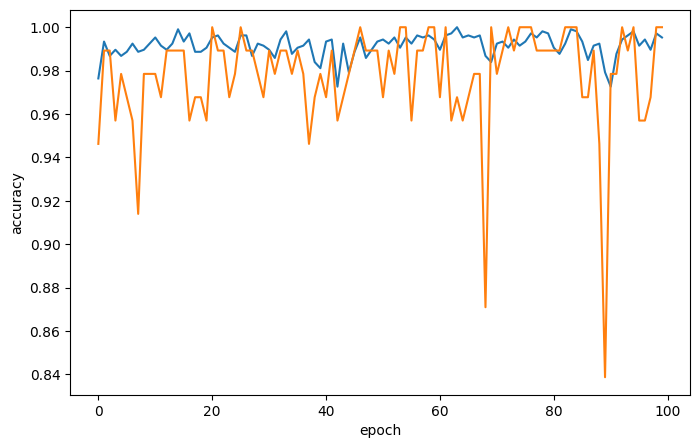

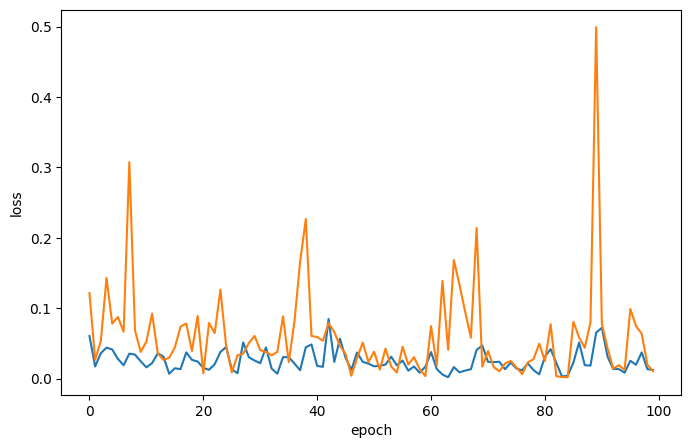

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history_eff2.history["accuracy"])
plt.plot(history_eff2.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_eff2.history["loss"])
plt.plot(history_eff2.history["val_loss"])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


4/4 [==============================] - 1s 166ms/step
              precision    recall  f1-score   support

          DF       1.00      0.98      0.99        43
         BCC       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



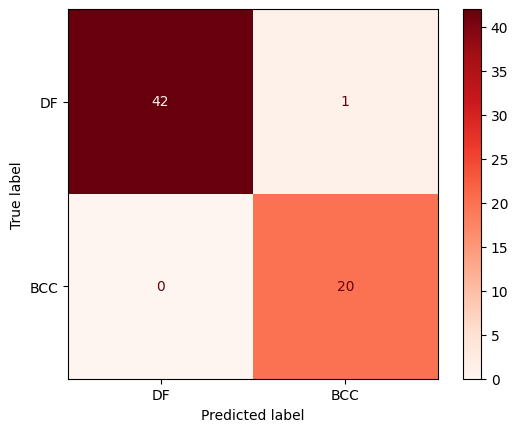

[1.0000000e+00 8.6438585e-11]


In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
ava_labels = [
    DF,
    BCC
]
true_labels = flow_test.classes
predictions = model_eff_layer1.predict(flow_test)
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=ava_labels)
print(cr)
disp = ConfusionMatrixDisplay(cm, display_labels=ava_labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()
print(predictions[6])